# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd

df_gifts = pd.read_csv('./ForeignGifts_edu.csv')
display(df_gifts.head())

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


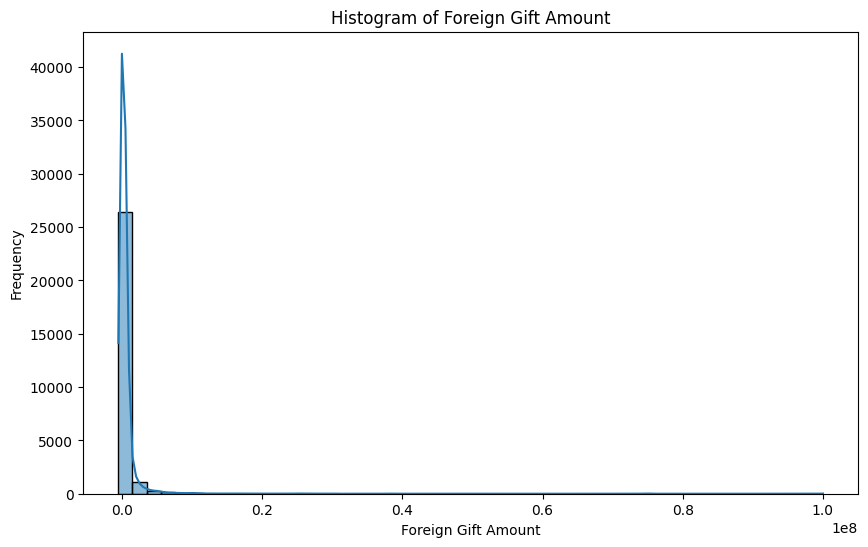

In [61]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

plt.figure(figsize=(10, 6))
sns.histplot(df_gifts['Foreign Gift Amount'], bins=50, kde=True)
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

In [62]:
display(df_gifts['Foreign Gift Amount'].describe())

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


The histogram shows a highly skewed distribution. Most foreign gift amounts are very small, concentrated at the lower end. There are a few very large gift amounts that stretch the x-axis significantly, making it difficult to see the detail of the smaller amounts. These are likely outliers. The mean is significantly larger than the median, which further confirms the right-skewness of the distribution and the presence of large outliers pulling the mean upwards. The range of foreign gift amounts is extremely wide, from a minimum of 0 to a very large maximum, indicating a vast difference in the size of gifts received.

In [63]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.
gift_type_counts = df_gifts['Gift Type'].value_counts()
display(gift_type_counts)

,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [11]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

total_gifts = df_gifts['Gift Type'].count()

contract_prop = gift_type_counts.get('Contract', 0) / total_gifts
real_estate_prop = gift_type_counts.get('Real Estate', 0) / total_gifts
monetary_prop = gift_type_counts.get('Monetary Gift', 0) / total_gifts

print(f"Proportion of Contracts: {contract_prop:.2%}")
print(f"Proportion of Real Estate: {real_estate_prop:.2%}")
print(f"Proportion of Monetary Gifts: {monetary_prop:.2%}")

Proportion of Contracts: 61.21%
Proportion of Real Estate: 0.04%
Proportion of Monetary Gifts: 38.75%


Based on the value counts and calculated proportions, the most common gift types are Contract and Monetary Gift, with Contract being the most frequent. The proportion of contracts is 61.21%. The proportion of real estate is 0.04%. The proportion of monetary gifts is 38.75%.
This indicates a strong prevalence of contractual agreements and direct monetary contributions as primary forms of foreign gifts, while real estate transactions are quite rare.

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


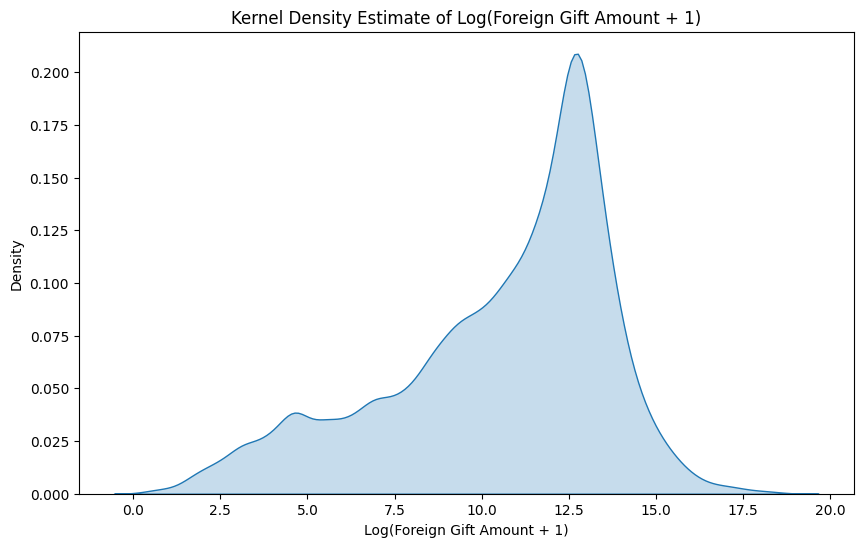

In [97]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_gifts['Foreign Gift Amount Log'] = np.log1p(df_gifts['Foreign Gift Amount'].replace({0: np.nan}))

plt.figure(figsize=(10, 6))
sns.kdeplot(df_gifts['Foreign Gift Amount Log'].dropna(), fill=True)
plt.title('Kernel Density Estimate of Log(Foreign Gift Amount + 1)')
plt.xlabel('Log(Foreign Gift Amount + 1)')
plt.ylabel('Density')
plt.show()

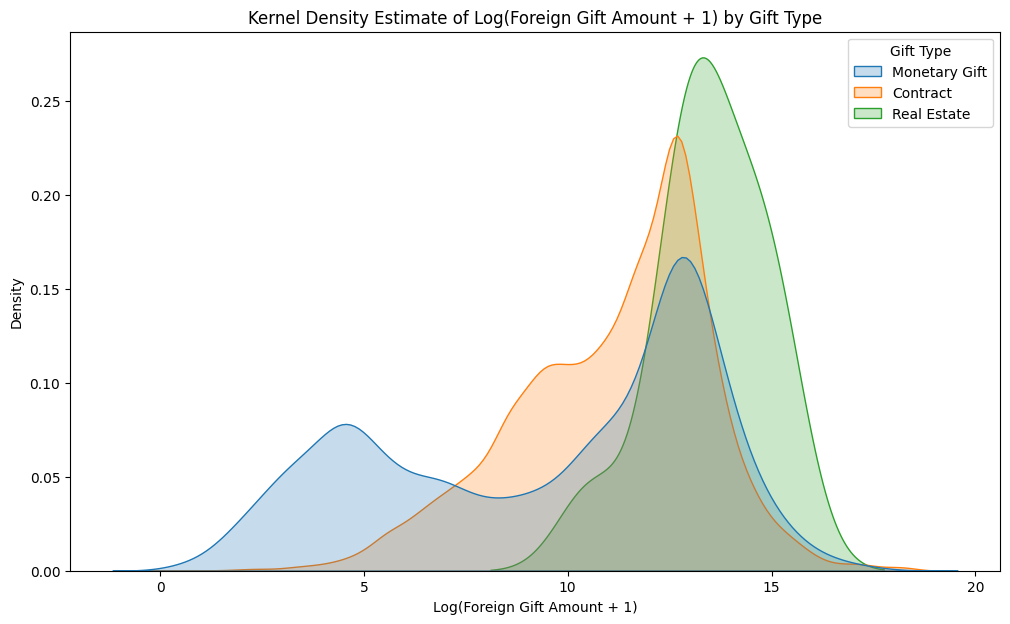

In [99]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_gifts, x='Foreign Gift Amount Log', hue='Gift Type', fill=True, common_norm=False)
plt.title('Kernel Density Estimate of Log(Foreign Gift Amount + 1) by Gift Type')
plt.xlabel('Log(Foreign Gift Amount + 1)')
plt.ylabel('Density')
# Removed: plt.legend(title='Gift Type') - seaborn's hue argument handles the legend automatically
plt.show()

The unconditional kernel density plot showed a multi-modal distribution. This suggests that there isn't a single 'typical' gift amount, but rather several distinct ranges where gifts tend to cluster. There was a prominent peak at the lower end (smaller log values), indicating many smaller gifts, along with smaller peaks or bumps corresponding to larger gift amounts. In summary, there are clear patterns where different gift types are associated with distinct distributions of 'Foreign Gift Amount' after log transformation, with contracts generally being smaller, monetary gifts having a wider and often larger range, and real estate representing the largest individual transactions.

In [14]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

top_15_countries_by_count = df_gifts['Country of Giftor'].value_counts().head(15)
display('Top 15 Countries by Number of Gifts:', top_15_countries_by_count)

'Top 15 Countries by Number of Gifts:'

,count
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [15]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

top_15_countries_by_amount = df_gifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
display('Top 15 Countries by Amount Given:', top_15_countries_by_amount)

'Top 15 Countries by Amount Given:'

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [16]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

top_15_institutions_by_amount = df_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
display('Top 15 Institutions by Total Amount Received:', top_15_institutions_by_amount)

'Top 15 Institutions by Total Amount Received:'

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


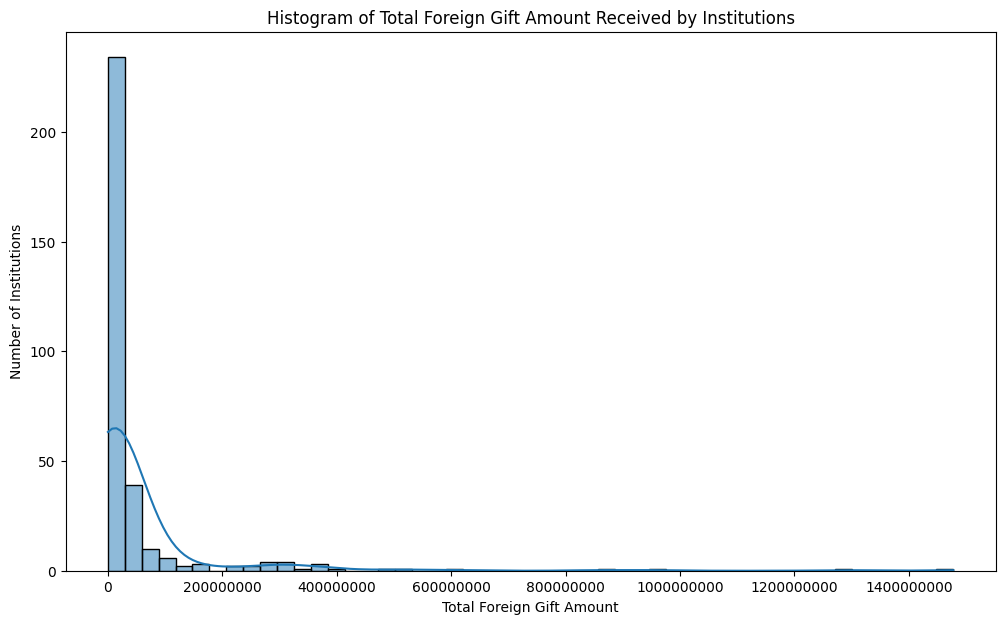

In [58]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

total_amount_by_institution = df_gifts.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(12, 7))
sns.histplot(total_amount_by_institution, bins=50, kde=True)
plt.title('Histogram of Total Foreign Gift Amount Received by Institutions')
plt.xlabel('Total Foreign Gift Amount')
plt.ylabel('Number of Institutions')
plt.ticklabel_format(style='plain', axis='x') # To prevent scientific notation on x-axis
plt.show()

In [18]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

top_giftors_by_amount = df_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
display('Top 15 Giftors by Total Amount Given:', top_giftors_by_amount)

'Top 15 Giftors by Total Amount Given:'

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


The giftors that provide the most money in total is Qatar Foundation, Qatar Foundation/Qatar National Res, Qatar Foundation for Education, Anonymous, Saudi Arabian Cultural Mission, HCL, Church of Jesus Christ of LDS, Emirates Institute for Advanced Sc, QIC, Anonymous #9, Qatar National Research Fund, Government of Saudi Arabia, Contracting Party, CMKL University, and Royal Embassy of Saudi Arabia.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [57]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning and describing the data.

df_airbnb = pd.read_csv('./airbnb_hw.csv')

# Clean 'Price' column: remove non-numeric characters and convert to numeric
df_airbnb['Price'] = df_airbnb['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')

# Drop rows where 'Price' is NaN after coercion (optional, but good for clean plots)
df_airbnb.dropna(subset=['Price'], inplace=True)

display(df_airbnb.head())
print('Dimensions of the DataFrame:', df_airbnb.shape)
print('Number of observations:', df_airbnb.shape[0])
print('Variables (columns) included:', df_airbnb.columns.tolist())

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Dimensions of the DataFrame: (30478, 13)
Number of observations: 30478
Variables (columns) included: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


In [20]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in crosstabulating the data.

cross_tab = pd.crosstab(df_airbnb['Property Type'], df_airbnb['Room Type'])
display(cross_tab)

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


The cross-tabulation of “Room Type” and “Property Type” reveals clear patterns in rental availability. Apartments are the most common property type, making up the largest number of listings across all room types, followed by houses. For apartments and lofts, listings categorized as “Entire home/apt” are more prevalent than “Private room,” though private rooms in apartments still represent a significant share. In contrast, for bed and breakfasts and houses, “Private room” listings are more frequent than “Entire home/apt,” a trend that also appears in dorm accommodations. Other property types have relatively few listings, making broad comparisons less reliable. Overall, most listings fall under either “Apartment” or “House,” while “Shared room” is consistently the least common room type. More unique property types, such as boats, bungalows, cabins, appear only rarely, indicating they represent niche market offerings.

In [84]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the the variables and describing the data.

df_airbnb = pd.read_csv('./airbnb_hw.csv')

# Clean 'Price' column: remove non-numeric characters and convert to numeric
df_airbnb['Price'] = df_airbnb['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')

# Drop rows where 'Price' is NaN after coercion (optional, but good for clean plots)
df_airbnb.dropna(subset=['Price'], inplace=True)

display(df_airbnb.head())
print('Dimensions of the DataFrame:', df_airbnb.shape)
print('Number of observations:', df_airbnb.shape[0])
print('Variables (columns) included:', df_airbnb.columns.tolist())

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Dimensions of the DataFrame: (30478, 13)
Number of observations: 30478
Variables (columns) included: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']


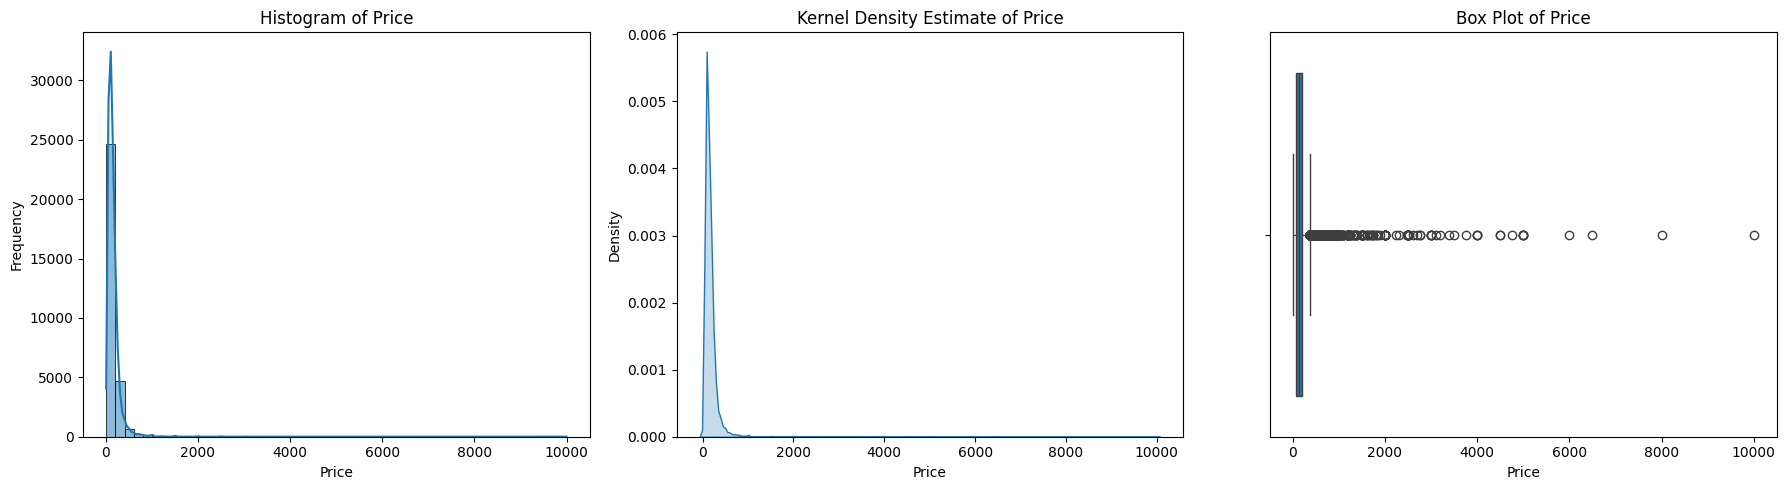

In [85]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the visualizations.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes for original Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(df_airbnb['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot
sns.kdeplot(df_airbnb['Price'], fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Estimate of Price')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

# Box Plot
sns.boxplot(x=df_airbnb['Price'], ax=axes[2])
axes[2].set_title('Box Plot of Price')
axes[2].set_xlabel('Price')

plt.tight_layout()
plt.show()

In [86]:
display('Statistical Description of Original Price:', df_airbnb['Price'].describe())

'Statistical Description of Original Price:'

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


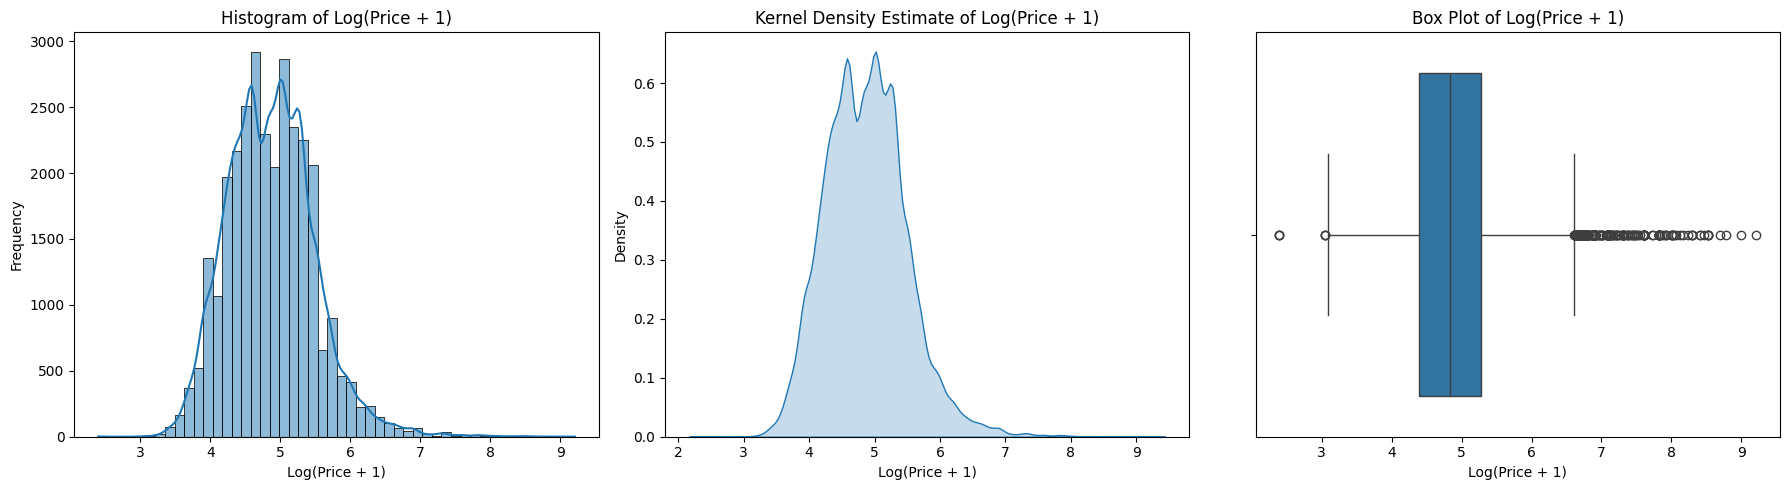

In [87]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the visualizations.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create log-transformed price variable, handling potential zeros
df_airbnb['price_log'] = np.log1p(df_airbnb['Price'])

# Set up the figure and axes for log-transformed Price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram for price_log
sns.histplot(df_airbnb['price_log'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Histogram of Log(Price + 1)')
axes[0].set_xlabel('Log(Price + 1)')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot for price_log
sns.kdeplot(df_airbnb['price_log'], fill=True, ax=axes[1])
axes[1].set_title('Kernel Density Estimate of Log(Price + 1)')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Density')

# Box Plot for price_log
sns.boxplot(x=df_airbnb['price_log'], ax=axes[2])
axes[2].set_title('Box Plot of Log(Price + 1)')
axes[2].set_xlabel('Log(Price + 1)')

plt.tight_layout()
plt.show()

In [88]:
display('Statistical Description of Log(Price + 1):', df_airbnb['price_log'].describe())

'Statistical Description of Log(Price + 1):'

,price_log
count,30478.000000
mean,4.869699
std,0.622704
min,2.397895
25%,4.394449
50%,4.836282
75%,5.278115
max,9.210440


The original price variable is highly right-skewed: histograms and KDE plots show many listings at low prices with a long upper tail, and the box plot highlights numerous high-end outliers. Descriptive statistics confirm this, with a mean much larger than the median and a wide range, indicating poor scaling and difficulty seeing patterns among lower-priced listings due to a few extreme values. After applying a log transformation, the price_log distribution becomes more symmetric and roughly bell-shaped, with far fewer extreme outliers and a tighter spread in the histogram, KDE, and box plot. The summary statistics for price_log show a smaller range and standard deviation, and the mean and median are much closer, indicating a more balanced distribution that reduces skewness, dampens the influence of extreme values, and makes the data more suitable for many statistical analyses.

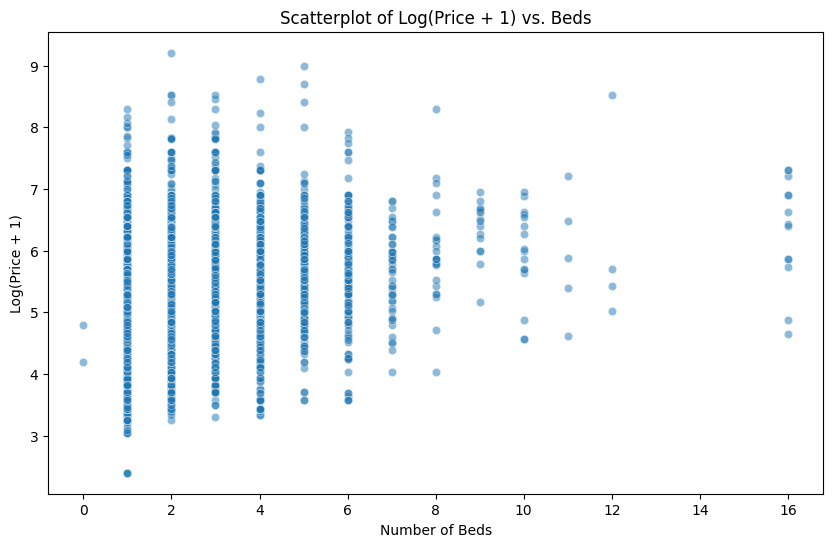

In [89]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the scatterplot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a scatterplot of price_log and Beds
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='Beds', y='price_log', alpha=0.5)
plt.title('Scatterplot of Log(Price + 1) vs. Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price + 1)')
plt.show()

In [90]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in describing the data.

# Compute a description of Price conditional on/grouped by the number of beds
price_by_beds_description = df_airbnb.groupby('Beds')['Price'].describe()
display('Description of Price grouped by Number of Beds:', price_by_beds_description)

'Description of Price grouped by Number of Beds:'

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


Average price tends to increase with the number of beds, and the standard deviation generally rises as well, indicating greater variation in prices for larger, more expensive properties. The presence of a "0 beds" category with a mean price around 92 dollars likely reflects studios or listings without an explicit bed count but priced similarly to single-occupancy units. Extremely high maximum prices for some bed counts (such as $10,000 for 2 beds) suggest outliers that further inflate the standard deviation.

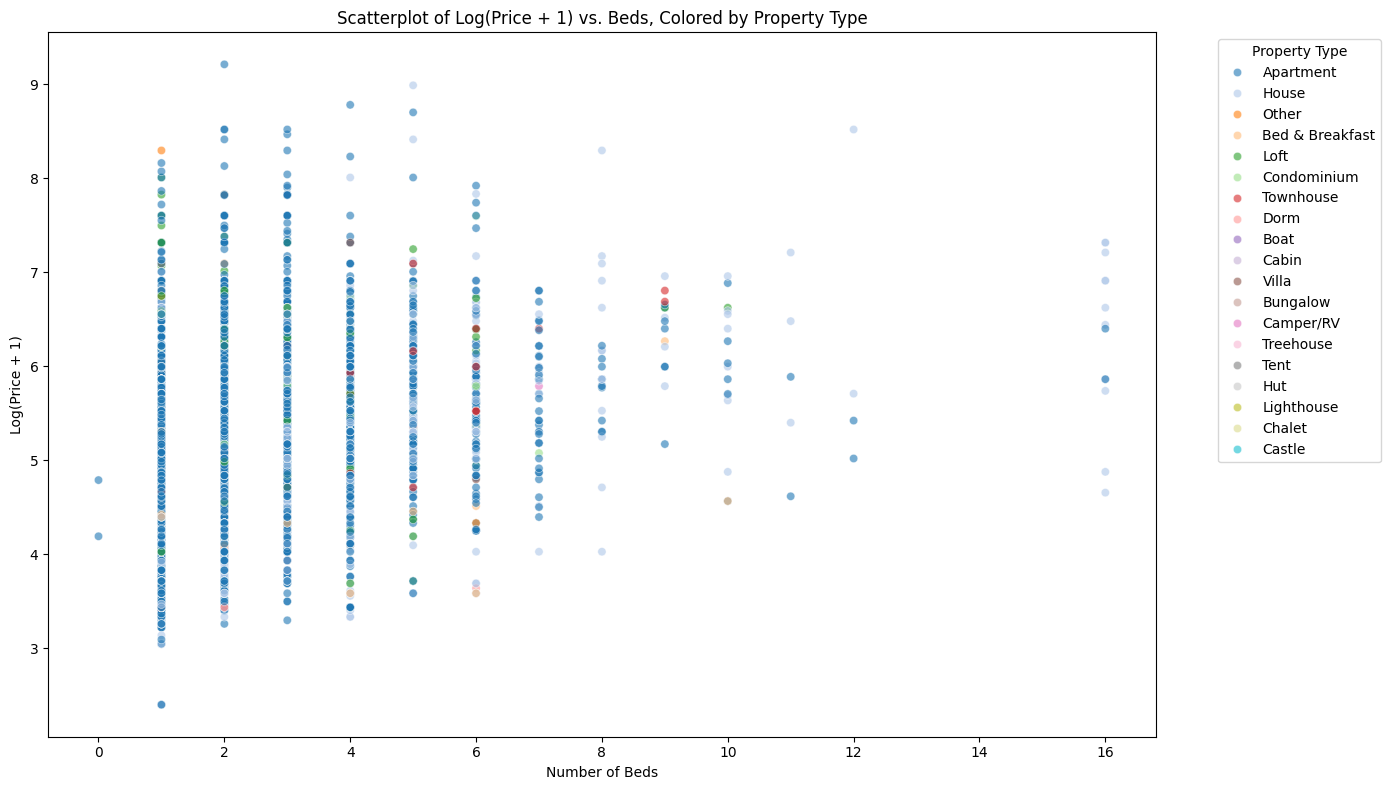

In [91]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the scatterplot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot colored by Property Type
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_airbnb, x='Beds', y='price_log', hue='Property Type', alpha=0.6, palette='tab20')
plt.title('Scatterplot of Log(Price + 1) vs. Beds, Colored by Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price + 1)')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

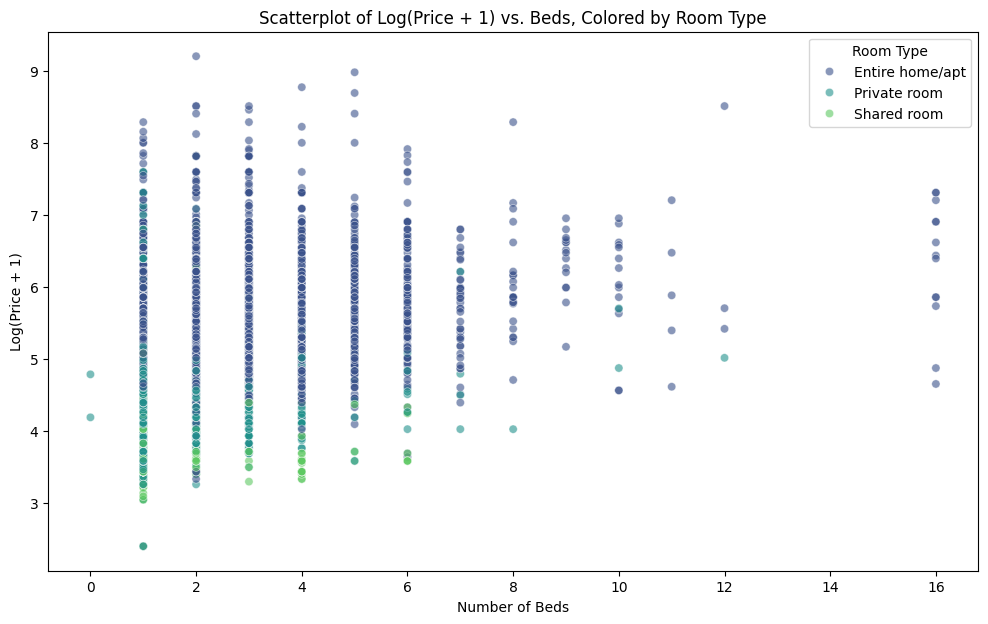

In [92]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the scatterplot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scatterplot colored by Room Type
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_airbnb, x='Beds', y='price_log', hue='Room Type', alpha=0.6, palette='viridis')
plt.title('Scatterplot of Log(Price + 1) vs. Beds, Colored by Room Type')
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price + 1)')
plt.legend(title='Room Type')
plt.show()

Apartments and houses are the most dominant property types, appearing across various bed counts and price ranges. They show a wide spread of prices. Apartments are particularly numerous at 1-2 beds.
Less common property types (e.g., loft, condominium) tend to occupy specific niches, often aligning with higher price points or particular bed configurations. Very unique types (e.g., treehouse, boat) are sparse but can have varied pricing.
The property type influences the base price and how price scales with beds.

The scatterplot shows clear price differences by room type. Entire home/apartment listings have higher price_log values that rise steadily with more beds. Private rooms cluster at lower prices, mostly with one to five beds, showing a weaker link between price and bed count. Shared rooms appear at the lowest prices, typically with one to two beds. Overall, room type strongly differentiates price, with Entire home/apartment being the most expensive and Shared room the least.

In [93]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in describing the data.

# Compute description of Price conditional on Room Type and Property Type
price_by_room_property_description = df_airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe()
display('Description of Price grouped by Room Type and Property Type:', price_by_room_property_description)

'Description of Price grouped by Room Type and Property Type:'

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

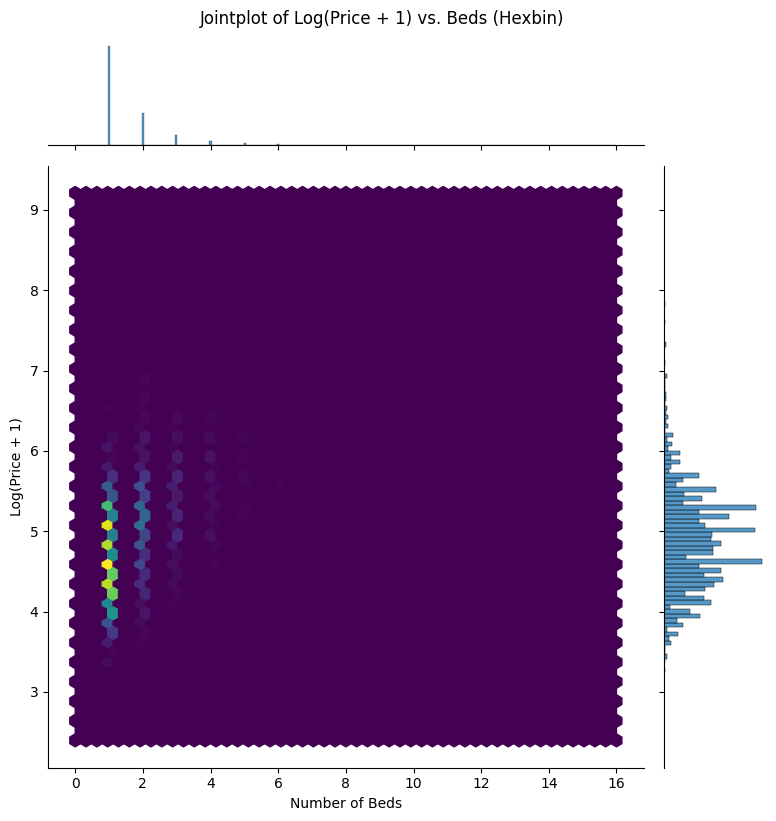

In [94]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the jointplot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a jointplot with kind=hex
sns.jointplot(data=df_airbnb, x='Beds', y='price_log', kind='hex', height=8, cmap='viridis')
plt.suptitle('Jointplot of Log(Price + 1) vs. Beds (Hexbin)', y=1.02) # Adjust suptitle position
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price + 1)')
plt.show()

The jointplot changes how I interpret the earlier scatterplots by revealing the true density of the data. While the scatterplots prior suggested broad and evenly distributed patterns, the jointplot shows that most listings cluster around smaller, more affordable properties. The positive trends seen for larger or pricier listings exist but represent far fewer data points. Overall, the jointplot clarifies that the market is dominated by low‑bed, low‑price listings, and patterns from sparse regions in the scatterplots should be viewed with caution.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [51]:
import pandas as pd

df_drilling = pd.read_csv('./drilling_rigs.csv')

In [50]:
print('Number of observations (rows):', df_drilling.shape[0])
print('Number of variables (columns):', df_drilling.shape[1])
print('\nFirst 5 rows of the data:')
display(df_drilling.head())

Number of observations (rows): 623
Number of variables (columns): 12

First 5 rows of the data:


,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time,Rig Count First Difference
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549.0,1973-01-01,NaN
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677.0,1973-02-01,128.0
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805.0,1973-03-01,128.0
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898.0,1973-04-01,93.0
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991.0,1973-05-01,93.0


The df_drilling DataFrame contains 623 observations and 10 variables, with some rig count columns correctly stored as int64 and others, including several rig totals and Active Well Service Rig Count (Number of Rigs), still coded as object due to values like "Not Available". The Month column is also an object, holding strings such as "1973 January". To clean the data, Month should be converted to a proper datetime column (for example, using df['time'] = pd.to_datetime(df['Month'], format='mixed')), and the rig-related object columns should have "Not Available" replaced with a numeric placeholder such as np.nan before converting them to numeric types.

In [71]:
df_drilling['time'] = pd.to_datetime(df_drilling['Month'], format='mixed')
display(df_drilling.head())

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs),time,Rig Count First Difference
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549.0,1973-01-01,NaN
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677.0,1973-02-01,128.0
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805.0,1973-03-01,128.0
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898.0,1973-04-01,93.0
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991.0,1973-05-01,93.0


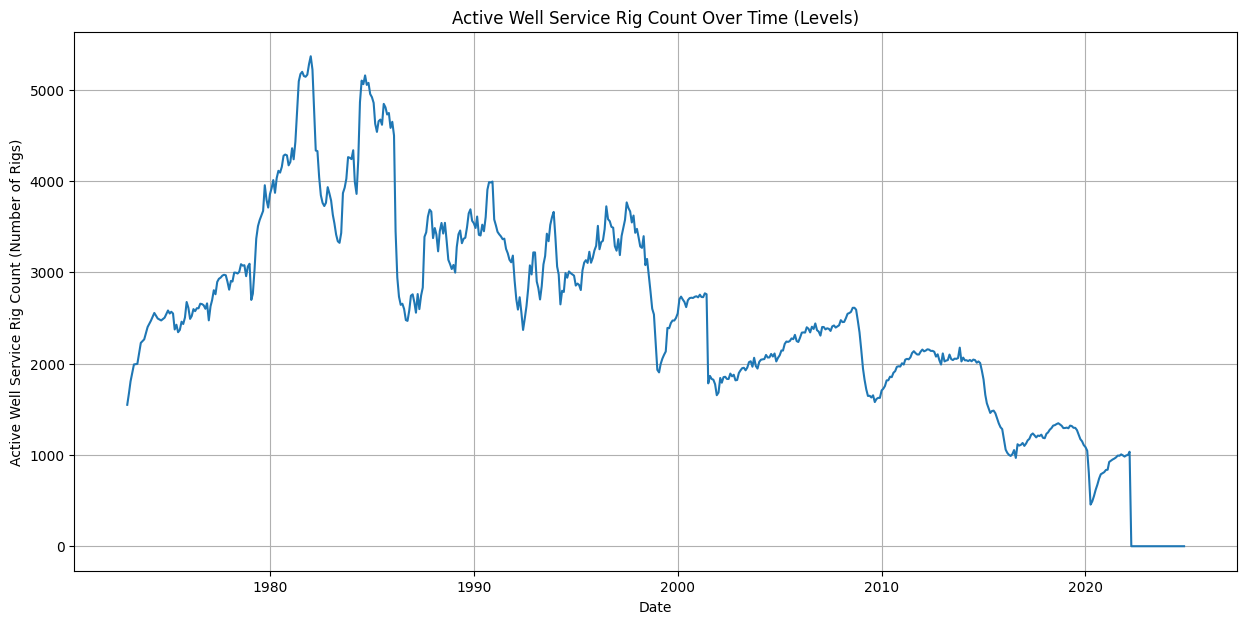

In [81]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df_drilling is loaded and processed if not already (for robustness)
if 'df_drilling' not in locals():
    df_drilling = pd.read_csv('./drilling_rigs.csv')
    df_drilling['time'] = pd.to_datetime(df_drilling['Month'], format='mixed')
    df_drilling['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
        df_drilling['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
    )
    df_drilling['Active Well Service Rig Count (Number of Rigs)'] = df_drilling['Active Well Service Rig Count (Number of Rigs)'].fillna(0)

# Create a line plot of the Active Well Service Rig Count (levels)
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_drilling, x='time', y='Active Well Service Rig Count (Number of Rigs)')
plt.title('Active Well Service Rig Count Over Time (Levels)')
plt.xlabel('Date')
plt.ylabel('Active Well Service Rig Count (Number of Rigs)')
plt.grid(True)
plt.show()

The “Active Well Service Rig Count” time series shows clear boom‑and‑bust cycles driven by oil market conditions. After peaking in the late 1970s and early 1980s, rig counts declined sharply, stabilized through the 1990s, and surged again in the 2000s during the shale boom before falling in the mid‑2010s and early 2020s. Major drops align with industry downturns such as the 1980s crash, the 2008 crisis, oil price collapses in 2015–2016, and the COVID‑19 shock in 2020. Overall, the trend highlights the industry’s strong sensitivity to global economic and energy market shifts.

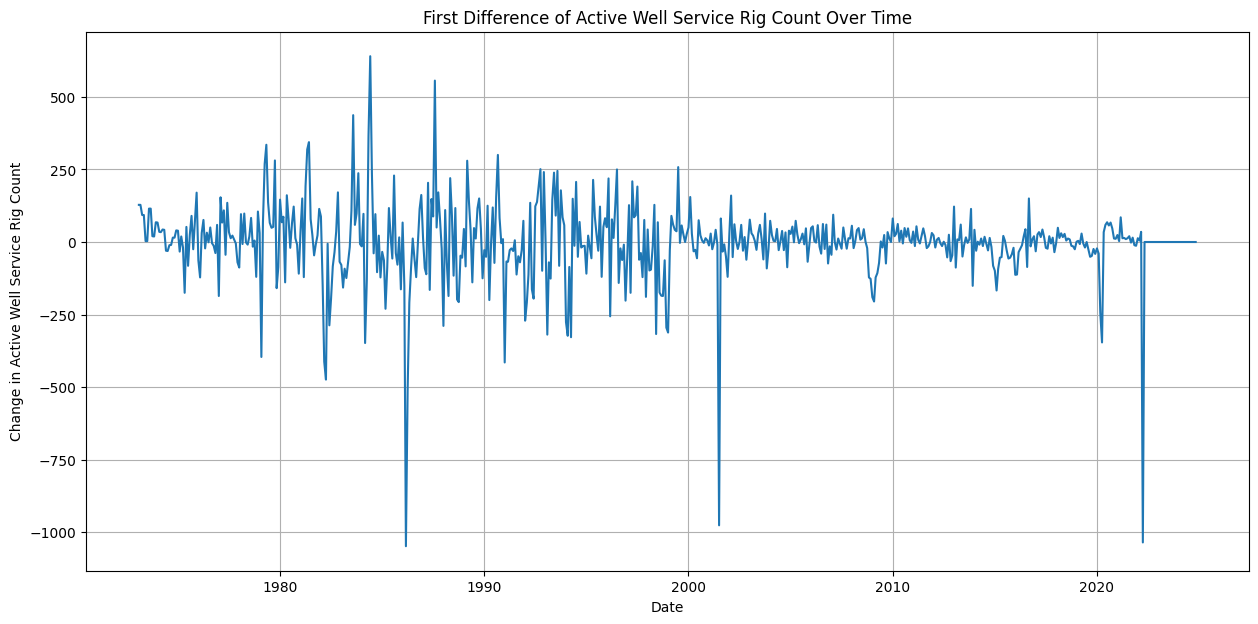

In [80]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in creating the plot.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Ensure df_drilling is loaded (re-load if necessary due to kernel state)
df_drilling = pd.read_csv('./drilling_rigs.csv')

# Ensure 'time' column is created and 'Active Well Service Rig Count' is numeric
df_drilling['time'] = pd.to_datetime(df_drilling['Month'], format='mixed')
df_drilling['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(
    df_drilling['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'
)
df_drilling['Active Well Service Rig Count (Number of Rigs)'] = df_drilling['Active Well Service Rig Count (Number of Rigs)'].fillna(0)

# Compute the first difference
df_drilling['Rig Count First Difference'] = df_drilling['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot the first difference over time
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_drilling, x='time', y='Rig Count First Difference')
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Active Well Service Rig Count')
plt.grid(True)
plt.show()

The first difference plot shows month‑to‑month changes in active rig counts, with positive values indicating growth and negative values declines. It is highly volatile, frequently oscillating between increases and decreases, showing that rig activity changes rapidly rather than remaining steady. Large positive spikes in the early 1980s and 2010s mark rapid drilling expansion, while deep drops in the mid‑1980s, 2015–2016, and early 2020 reflect sharp pullbacks. Compared to the levels plot, the first difference better captures the rate of change, revealing sudden surges or declines and periods of stability when values hover near zero.

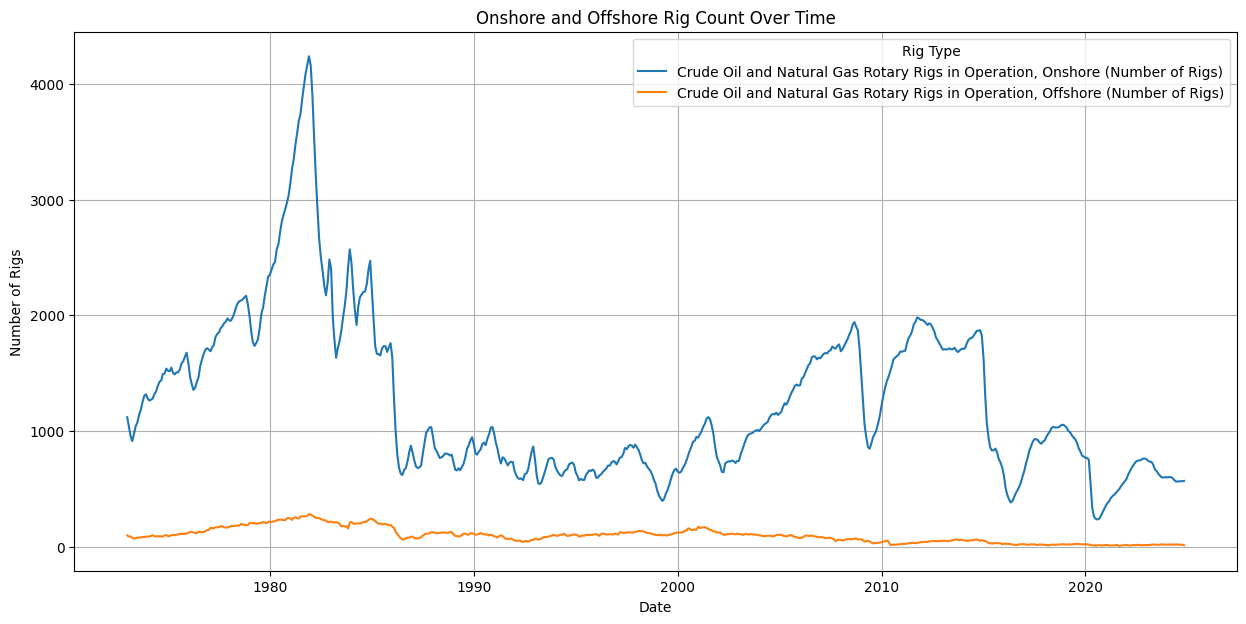

In [69]:
# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in melting the columns and plotting the results.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the columns to melt
onshore_col = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'
offshore_col = 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'

# Melt the DataFrame to combine onshore and offshore rig counts into a single column
df_melted = df_drilling.melt(id_vars=['time'], value_vars=[onshore_col, offshore_col],
                             var_name='Rig Type', value_name='Rig Count')

# Plot the resulting series
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_melted, x='time', y='Rig Count', hue='Rig Type')
plt.title('Onshore and Offshore Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.legend(title='Rig Type')
plt.show()